In [110]:
from typing import Callable, Iterable, List
from random import randint
from functools import lru_cache
from matplotlib import pyplot as plt
from datetime import datetime
import random
import math


class Input:
	_id: int = 1
	def __init__(self, custom_id=None) -> None:
		if custom_id is not None:
			self.id = str(custom_id)
		else:
			self.id = str(Input._id)
			Input._id += 1
	
	def calc(self, t: int) -> float:
		raise NotImplementedError()
	
class Neuron(Input):
	_id: int = 1
	def __init__(
			self,
			f: Callable[[float], float],
			offset: float = 0,
			inputs: List[Input]|None = None,
			weights: List[float]|None = None,
	) -> None:
		if inputs is None:
			inputs = []
		if weights is None:
			weights = []
		
		if len(inputs) != len(weights):
			raise ValueError("weights' len and inputs' len mismatch")
		
		super().__init__(f"n{Neuron._id}")
		Neuron._id += 1

		self._offset = offset
		self._f = f
		self._inputs = inputs
		self._weights = weights
		
	
	def add_input(self, input: Input, weight: float):
		self._weights.append(weight)
		self._inputs.append(input)

	@lru_cache
	def calc(self, t: int):
		if t <= 0:
			return 0
		
		h: float = self._offset
		for w, i in zip(self._weights, self._inputs):
			h += w * i.calc(t-1)
		return self._f(h)
	
	def __repr__(self) -> str:
		return  "Neuron(id={}, weights={}, input_ids={})".format(
			self.id,
			self._weights,
			list(map(lambda n: n.id, self._inputs))
		)
	

class InitialInput(Input):
	_id = 1
	def __init__(self, f: Callable[[int], float]) -> None:
		super().__init__(f"x{InitialInput._id}")
		InitialInput._id += 1
		self.f = f

	def calc(self, t):
		return self.f(t)


def relu(x: float) -> float:
	if(x < 0):
		return 0
	return x


def init(neurons_count: int) -> List[Neuron]:
	neurons = [
		Neuron(
			relu,
			random.uniform(-10, 10)
		)
		for _ in range(neurons_count)
	]
	for n in neurons:
		for input_neuron in random.sample(neurons, k=randint(1, len(neurons))):
			n.add_input(
				input_neuron,
				random.uniform(-1.5, 1.5)
			)
	return neurons

def calc_y(neurons: List[Neuron], t_range: Iterable[int]) -> List[List[float]]:
	y: List[List[float]] = [[] for _ in range(len(neurons))]
	for t in t_range:
		for i in range(len(neurons)):
			y[i].append(neurons[i].calc(t))
	return y

def plot_y_from_t(y: List[List[float]]) -> None:
	grid_size = math.ceil(len(y)**(1/2))
	for i in range(len(y)):
		plt.subplot(grid_size, grid_size, i+1)
		plt.scatter(range(len(y[0])), y[i], label=f"y_{i}(t)")
		plt.legend()
	plt.show()

def plot_yi_from_yj(y: List[List[float]]) -> None:
	grid_size = len(y)
	for i in range(len(y)):
		for j in range(len(y)):
			plt.subplot(grid_size, grid_size, i*grid_size+j+1)
			plt.scatter(y[i], y[j], label=f"y_{i}(y_{j})")
			plt.legend()
	plt.show()

plt.rcParams['text.usetex'] = True
random.seed(datetime.now().timestamp())

In [136]:
#regen
neurons = init(4)
print(*neurons, sep='\n')
y = calc_y(neurons, range(10000))

Neuron(id=n25, weights=[-0.11532913232511932, 0.23020699974753622, -0.3820232004576365], input_ids=['n28', 'n26', 'n25'])
Neuron(id=n26, weights=[-0.4902286743843973, -0.31394401552633977], input_ids=['n27', 'n28'])
Neuron(id=n27, weights=[-0.16381315319142997, -0.03165762368607172], input_ids=['n25', 'n28'])
Neuron(id=n28, weights=[1.4221935628143738, 0.604136326940016, -0.20547109778083672, -1.143254373894287], input_ids=['n26', 'n27', 'n28', 'n25'])


In [144]:
y[3]

[0,
 9.580970911675553,
 1.167849072646785,
 6.159915846494297,
 2.9784725556631706,
 4.983877774878029,
 3.7173153891180926,
 4.516992311807935,
 4.0120685043165185,
 4.330879496008851,
 4.129580609833509,
 4.25668172168383,
 4.176429447999187,
 4.227101132086509,
 4.195106779112557,
 4.215308172463903,
 4.202552912381562,
 4.210606646940245,
 4.205521478944996,
 4.208732279270171,
 4.206704964000001,
 4.2079850209292475,
 4.20717678662735,
 4.207687109779266,
 4.207364889206879,
 4.207568340876432,
 4.2074398804819335,
 4.207520991012955,
 4.207469777420874,
 4.20750211393724,
 4.2074816965002215,
 4.2074945881713495,
 4.207486448306179,
 4.2074915878574695,
 4.207488342719264,
 4.207490391715642,
 4.207489097969153,
 4.207489914847111,
 4.207489399066311,
 4.20748972473287,
 4.207489519105386,
 4.207489648939601,
 4.207489566961634,
 4.207489618722932,
 4.20748958604059,
 4.207489606676383,
 4.207489593646839,
 4.207489601873758,
 4.207489596679241,
 4.207489599959085,
 4.2074895978

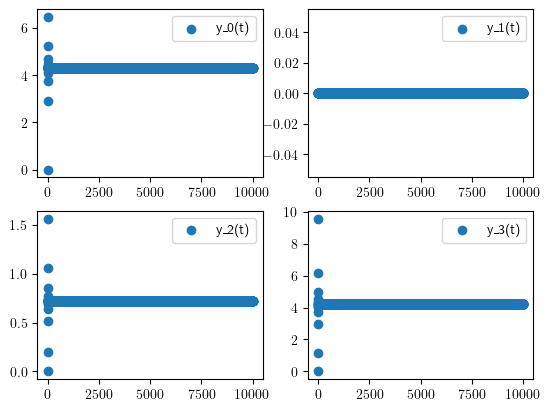

In [145]:
plot_y_from_t(y)

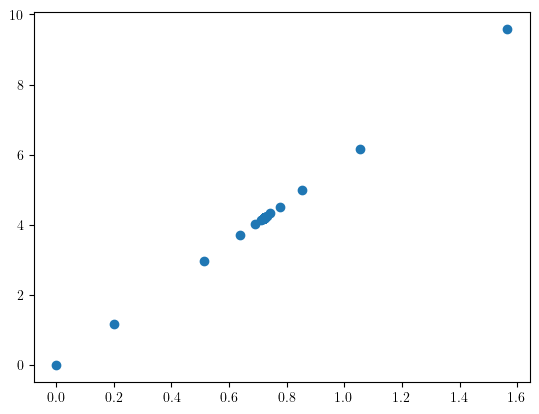

In [142]:
plt.scatter(y[2], y[3], label=f"y_3(y_2)")
plt.show()